# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np


titanic = sns.load_dataset('titanic')

# Selecionar features úteis (evita colunas com alto nível de missing ou informação irrelevante)
# Você pode ajustar a lista conforme desejar
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck', 'alone']

df = titanic[cols].copy()

In [2]:
from sklearn.impute import SimpleImputer

# Separar target
y = df['survived']
X = df.drop(columns=['survived'])

# Imputar coluna numérica age e fare com mediana
num_cols = ['age', 'fare', 'sibsp', 'parch', 'pclass']
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Para colunas categóricas (sex, embarked, deck, alone) imputar com moda
cat_cols = ['sex', 'embarked', 'deck', 'alone']
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Criar dummies (one-hot) para categóricas
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Conferir
print("Shape X:", X.shape)
print("Colunas X:", X.columns.tolist())

Shape X: (891, 15)
Colunas X: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'alone_True']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)

Treino: (623, 15) Teste: (268, 15)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

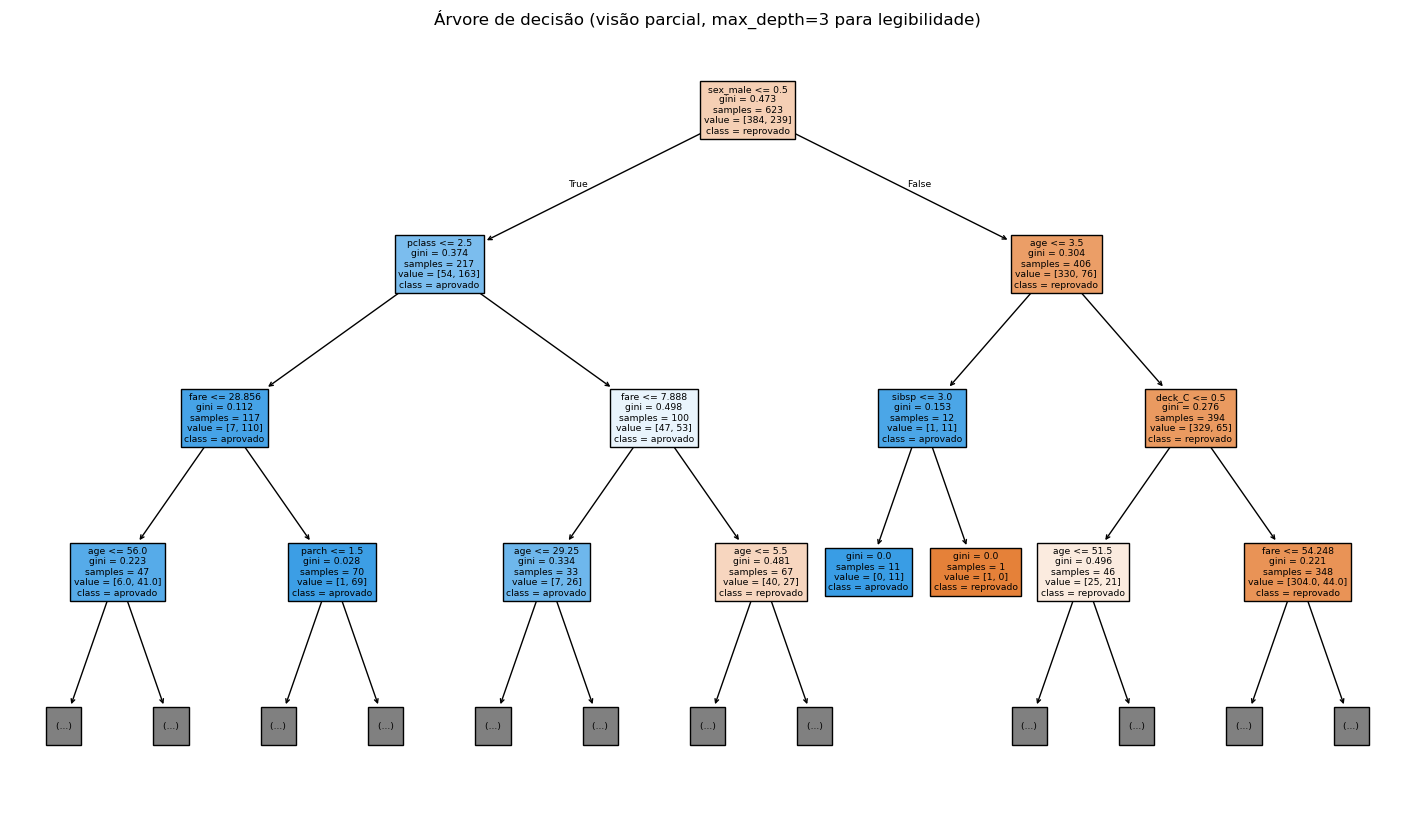

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Definir o objeto (árvore padrão)
clf = DecisionTreeClassifier(random_state=42)

# 2. Treinar
clf.fit(X_train, y_train)

# 3. Visualizar a árvore (aumentar figura)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['reprovado','aprovado'], filled=True, max_depth=3)
plt.title("Árvore de decisão (visão parcial, max_depth=3 para legibilidade)")
plt.show()

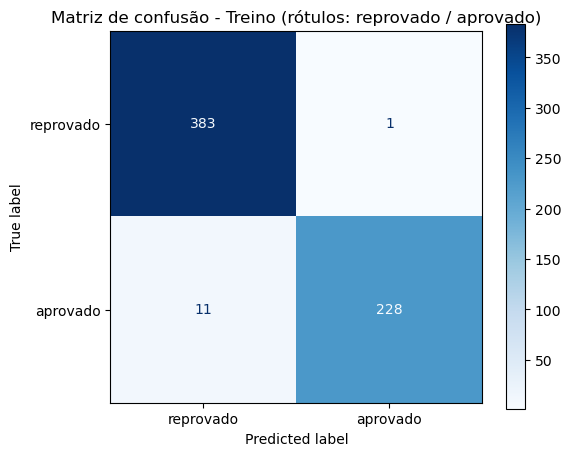

Acurácia no treino: 0.9807


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Previsões no treino
y_train_pred = clf.predict(X_train)

# Matriz de confusão (rotular como "aprovados"/"reprovados")
cm = confusion_matrix(y_train, y_train_pred, labels=[1,0])  # aqui organizamos (1,0) se quisermos a ordem
# Para exibir com rótulos legíveis:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred),
                              display_labels=['reprovado','aprovado'])
plt.figure(figsize=(6,5))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title("Matriz de confusão - Treino (rótulos: reprovado / aprovado)")
plt.show()

# Acurácia no treino
acc_train = accuracy_score(y_train, y_train_pred)
print(f"Acurácia no treino: {acc_train:.4f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

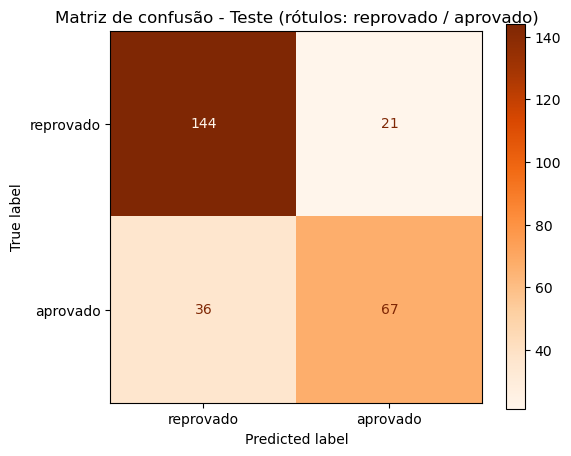

Acurácia no teste: 0.7873
Resumo: acurácia treino = 0.9807 ; acurácia teste = 0.7873


In [6]:
# 1. Classificar a base de teste
y_test_pred = clf.predict(X_test)

# 2. Matriz de confusão - teste
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred),
                                   display_labels=['reprovado','aprovado'])
plt.figure(figsize=(6,5))
disp_test.plot(cmap=plt.cm.Oranges, values_format='d', ax=plt.gca())
plt.title("Matriz de confusão - Teste (rótulos: reprovado / aprovado)")
plt.show()

# 3. Acurácia no teste
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no teste: {acc_test:.4f}")
print(f"Resumo: acurácia treino = {acc_train:.4f} ; acurácia teste = {acc_test:.4f}")

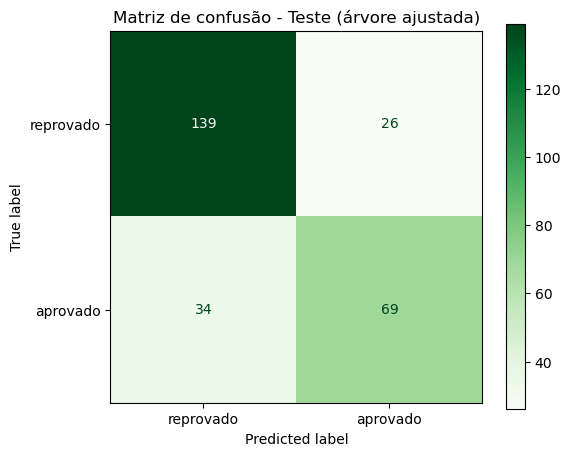

Acurácia no teste (árvore ajustada): 0.7761


In [7]:
clf_tuned = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_tuned.fit(X_train, y_train)

# Predições no teste
y_test_pred_tuned = clf_tuned.predict(X_test)

# Matriz de confusão e acurácia
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred_tuned),
                                    display_labels=['reprovado','aprovado'])
plt.figure(figsize=(6,5))
disp_tuned.plot(cmap=plt.cm.Greens, values_format='d', ax=plt.gca())
plt.title("Matriz de confusão - Teste (árvore ajustada)")
plt.show()

acc_test_tuned = accuracy_score(y_test, y_test_pred_tuned)
print(f"Acurácia no teste (árvore ajustada): {acc_test_tuned:.4f}")

In [8]:
# Proporção de previsões classificadas como 'reprovado' (0)
prop_reprovados = (y_test_pred_tuned == 0).mean()
print(f"Proporção de test set prevista como 'reprovado' (mau): {prop_reprovados:.4f}")

Proporção de test set prevista como 'reprovado' (mau): 0.6455


In [10]:
# "Classificar todos como aprovados" -> sempre prever 1
y_all_aprovados = np.ones_like(y_test)
acc_all_aprovados = accuracy_score(y_test, y_all_aprovados)
print(f"Acurácia classificando tudo como 'aprovado': {acc_all_aprovados:.4f}")

# Alternativamente, classificar todos como a classe majoritária do y_train:
major_class = y_train.mode()[0]
y_all_major = np.full_like(y_test, fill_value=major_class)
acc_all_major = accuracy_score(y_test, y_all_major)
print(f"Acurácia classificando tudo como classe majoritária ({major_class}): {acc_all_major:.4f}")

Acurácia classificando tudo como 'aprovado': 0.3843
Acurácia classificando tudo como classe majoritária (0): 0.6157
